In [1]:
using Plots

# SIR

\begin{eqnarray}
S(t+1) & = & S(t) - \frac{\beta I(t) S(t)}{N},               & \quad S(0) \ge 0,\\
I(t+1) & = & I(t) + \frac{\beta I(t) S(t)}{N} - \gamma R(t), & \quad I(0) \ge 0,\\
R(t+1) & = & R(t) + \gamma R(t),                             & \quad R(0) \ge 0.\\
\end{eqnarray}

Con:

   - $\beta$ la tasa de transmición.
   - $\gamma$ la tasa de recuperación.

In [2]:
function SIR(t,β,γ,I₀,S₀,R₀)
    S_t = Array{Float64,1}(undef, t+1)
    I_t = Array{Float64,1}(undef, t+1)
    R_t = Array{Float64,1}(undef, t+1)
    S_t[1] = S₀
    I_t[1] = I₀
    R_t[1] = R₀
    k = β/(I₀+S₀+R₀)
    for i in 1:t
        S_t[i+1] = S_t[i]-k*I_t[i]*S_t[i]
        I_t[i+1] = I_t[i]+k*I_t[i]*S_t[i]-γ*R_t[i]
        R_t[i+1] = R_t[i]+γ*R_t[i]
    end
    return S_t,I_t,R_t
end

SIR (generic function with 1 method)

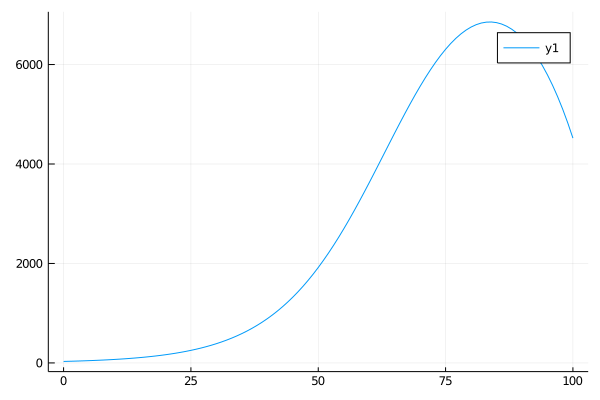

In [73]:
dias = 100
γ=1/14
β=0.1
I₀=30
S₀=10000
R₀=5
s,i,r = SIR(dias,β,γ,I₀,S₀,R₀)
t=0:1:dias
plot(t,i)

# SEIR

\begin{eqnarray}
S(t+1) & = & S(t) - \frac{\beta I(t) S(t)}{N},                & \quad S(0) \ge 0,\\
E(t+1) & = & E(t) + \frac{\beta I(t) S(t)}{N}  - \sigma E(t), & \quad E(0) \ge 0,\\
I(t+1) & = & I(t) + \sigma E(t) - \gamma R(t),                & \quad I(0) \ge 0,\\
R(t+1) & = & R(t) + \gamma R(t),                              & \quad R(0) \ge 0.\\
\end{eqnarray}

Con:

   - $\beta$ la tasa de transmición.
   - $\gamma$ la tasa de recuperación.
   - $\sigma$ la tasa de incubación.

In [8]:
function SEIR(t,σ,β,γ,I₀,S₀,R₀,E₀)
    S_t = Array{Float64,1}(undef, t+1)
    E_t = Array{Float64,1}(undef, t+1)
    I_t = Array{Float64,1}(undef, t+1)
    R_t = Array{Float64,1}(undef, t+1)
    S_t[1] = S₀
    E_t[1] = E₀
    I_t[1] = I₀
    R_t[1] = R₀
    k = β/(S₀+E₀+I₀+R₀)
    for i in 1:t
        S_t[i+1] = S_t[i]-k*I_t[i]*S_t[i]
        E_t[i+1] = E_t[i]+k*I_t[i]*S_t[i]-σ*E_t[i]
        I_t[i+1] = I_t[i]+σ*E_t[i]-γ*R_t[i]
        R_t[i+1] = R_t[i]+γ*R_t[i]
    end
    return S_t,E_t,I_t,R_t
end

SEIR (generic function with 1 method)

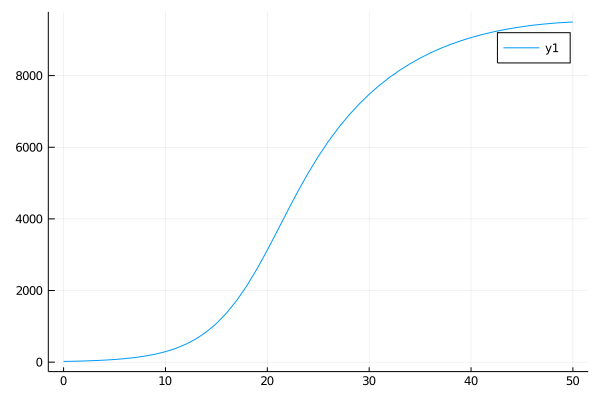

In [76]:
dias = 50
γ=1/14
β=1.39
σ=1/10
I₀=20
S₀=10000
R₀=9
E₀=60
s,e,i,r = SEIR(dias,σ,β,γ,I₀,S₀,R₀,E₀)
t=0:1:dias
plot(t,i)